In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

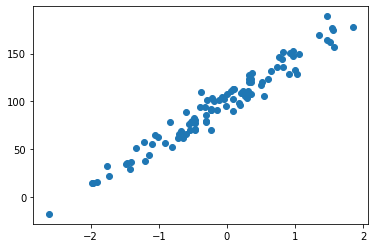

In [17]:
# Generates linear data with bias(c=100) and return the values of x, y and coefficient(m)
bias = 100
X, y, coef = make_regression(n_features=1, noise=10, bias =bias, random_state=42, coef= True)
plt.scatter(X, y)

In [28]:
# Custom implementation of Linear Regression Algorithm which generates a line (y = mx+c) by finding values of m and c
class LinearRegCustom:
    
    def __init__(self, lr=0.1):
        self.lr = lr  # learning rate decides the rate at which value of c and m will change in each iteration
    
    def fit(self, X, y):
        self._X = X 
        # Reshape y as 2d array else it will lead to some errors while calculations
        self._y = y.reshape(-1, 1) 
        
        # Initially take random values of m and c
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        errors = []
        
        # Store the error values for different values of m and c
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    
    # Give new value of m and c for each iteration by subtracting the change in gradient from older values
    def gradient_decend(self):
        # change in coefficient and intercept
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    # Returns the gradient value for each iteration
    def gradient(self):
        yh = self.predict(self._X) 
        
        # Equations used below is found by computations and mean of m and c values for each data is taken as final values
        d_coef = ((yh - self._y) * self._X).mean() 
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    # Predicts the value based on line equation : y = mx+c
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    # Returns error for particular set of values of m and c and sum of errors of each data is taken as final value
    def error(self):
        # Formulae to calculate error takes absolute difference(square of difference) of predicted and original values else positive and negative errors might cancel each other
        return ((self.predict(self._X) - self._y) ** 2).sum() 

In [58]:
model = LinearRegCustom(lr =1)

In [59]:
errors = model.fit(X, y)

In [60]:
model.coef_, model.intercept_


(44.43716999225498, 101.16511532052698)

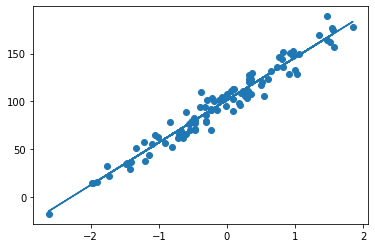

In [61]:
plt.scatter(X, y)
plt.plot(X, model.predict(X))

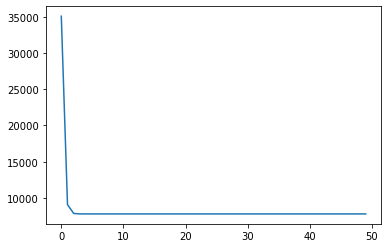

In [62]:
plt.plot(errors)

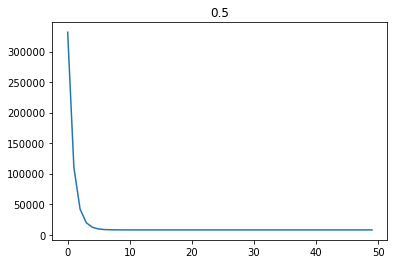

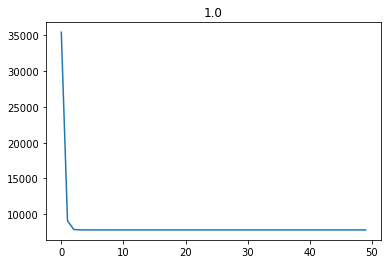

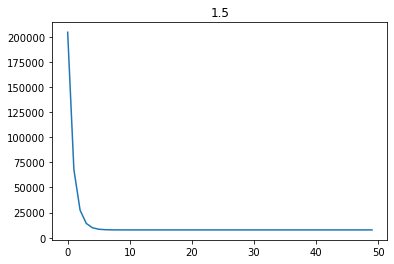

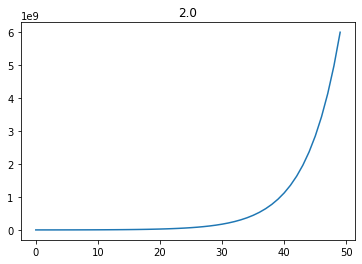

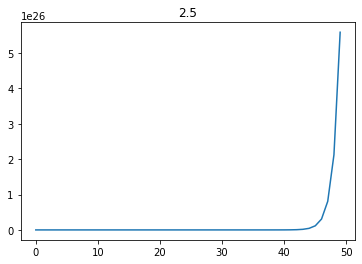

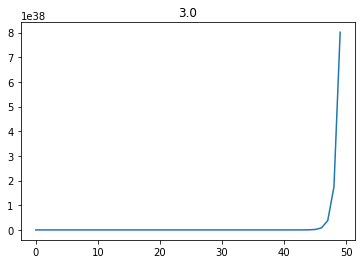

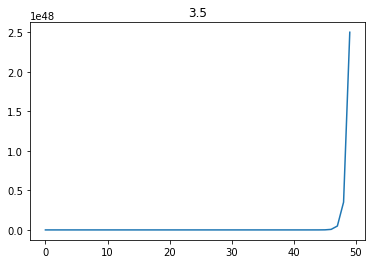

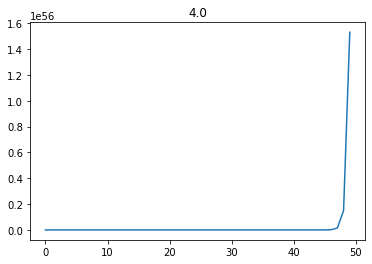

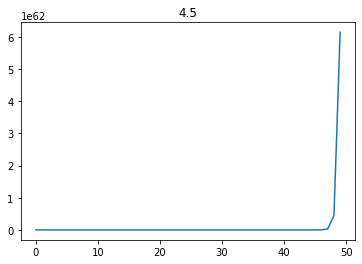

In [67]:
# To find out best learning rate error graphs are plotted for different values of lr and according most appropiate value is used for model training
for i in range (1, 10):
    model = LinearRegCustom(lr= 0.5 * i)
    errors = model.fit(X, y)
    
    plt.figure()
    plt.plot(errors)
    plt.title(str(0.5 * i))

## Housing Problem:

In [74]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [75]:
X, y = load_boston(return_X_y = True)

In [76]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [84]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [85]:
model.predict(X_test[:5])

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ])

In [86]:
y_test[:5]

array([23.6, 32.4, 13.6, 22.8, 16.1])

In [93]:
accuracy = model.score(X_test, y_test)*100

In [94]:
accuracy

72.61570836552478